# **Task 2: K-Means Clustering for Customer Segmentation**

**Step1: Import Necessary Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

**Step2: Load the Dataset**

In [3]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows of the dataset
print("Dataset:")
df

Dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Step3: Preprocess the Dataset**

In [4]:
# Encode the Gender column (Male = 0, Female = 1).
# Normalize numerical columns for better clustering performance.

# Encode the Gender column
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

# Select features for clustering
features = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Normalize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Convert back to DataFrame for visualization
df_scaled = pd.DataFrame(df_scaled, columns=features)
print("Scaled Data:")
df_scaled.head()


Scaled Data:


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


**Step4: Apply K-Means Clustering**

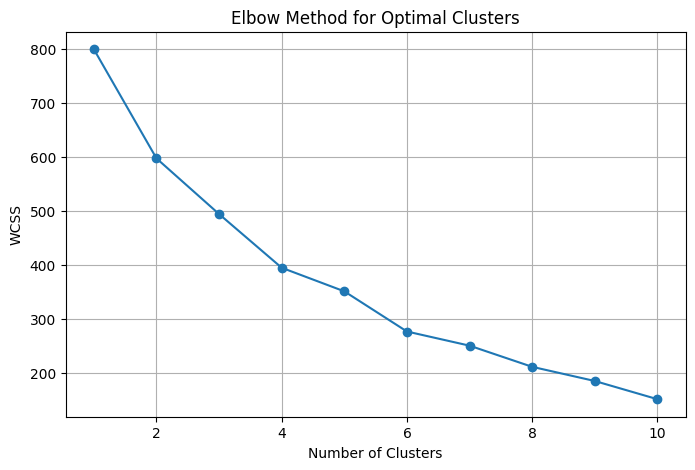

In [5]:
# Use the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()


In [6]:
# Select the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Display the dataset with cluster assignments
print("Dataset with Cluster Assignments:")
df


Dataset with Cluster Assignments:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,0
3,4,1,23,16,77,2
4,5,1,31,17,40,0
...,...,...,...,...,...,...
195,196,1,35,120,79,2
196,197,1,45,126,28,1
197,198,0,32,126,74,1
198,199,0,32,137,18,1


**Step5: Visualize the Clusters**

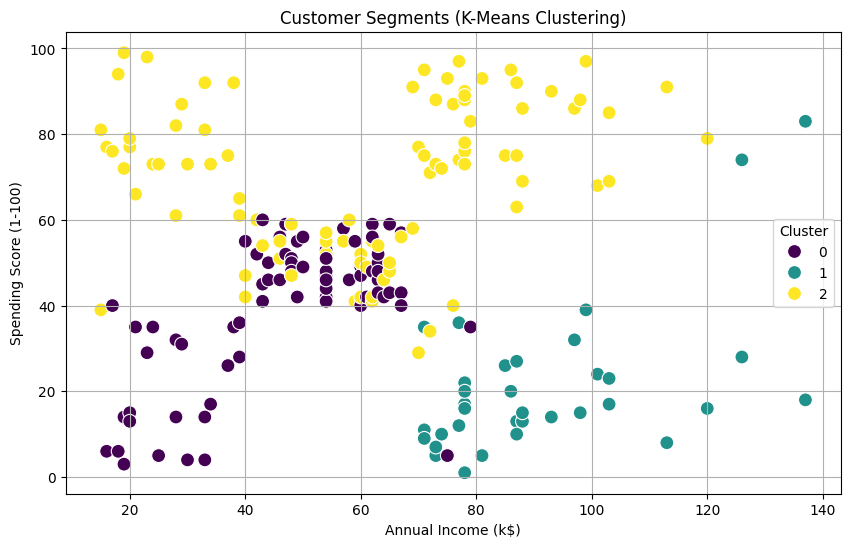

In [7]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="viridis",
    s=100
)
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.grid()
plt.show()


**Step6: Save Results and Summary**

In [8]:
# Save the dataset with clusters to a CSV file
df.to_csv("kmeans_customer_segmentation.csv", index=False)
print("Results saved to 'kmeans_customer_segmentation.csv'.")

# Cluster characteristics
print("\nCluster Characteristics:")
print(df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean())


Results saved to 'kmeans_customer_segmentation.csv'.

Cluster Characteristics:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        52.169014           46.676056               39.295775
1        40.228571           91.342857               20.628571
2        28.276596           59.585106               69.446809
